Project - End to End Data Engineering Project - Build data model and database
1. Find Datasets (minimum 3 datasets)
2. Build Data Model
3. Write Python code to create those table structure
4. Insert Data from files to database

In [3]:
!pip install psycopg2
!pip install pandas


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import psycopg2
import pandas as pd

In [5]:
def create_database():
    #connect to default database
    conn = psycopg2.connect("host=127.0.0.1 dbname=postgres user=postgres password=Kn111695")
    conn.set_session(autocommit=True)
    cur = conn.cursor()

    #create sparkify database with UTF8 enconding
    cur.execute("DROP DATABASE IF EXISTS accounts")
    cur.execute("CREATE DATABASE accounts")

    #close connection to default database
    conn.close()

    #connect to sparkify database
    conn = psycopg2.connect("host=127.0.0.1 dbname=accounts user=postgres password=Kn111695")
    cur = conn.cursor()

    return cur, conn

In [6]:
def drop_tables(cur,conn):
    for query in drop_tables_queries:
        cur.execute(query)
        conn.commit()

In [7]:
def create_tables(cur,conn):
    for query in create_table_queries:
        cur.execute(query)
        conn.commit()

In [8]:
df_countries = pd.read_csv("dataset-GDP by country/countries.csv")

In [9]:
df_countries.head()

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group
0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto
1,AFG,Asia,Southern Asia,no data,Afghanistan,Países de ingreso bajo
2,AGO,Africa,Sub-Saharan Africa,Middle Africa,Angola,Países de ingreso mediano bajo
3,ALB,Europe,Southern Europe,no data,Albania,Ingreso mediano alto
4,AND,Europe,Southern Europe,no data,Andorra,Ingreso alto


In [10]:
df_countries_gdp = pd.read_csv("dataset-GDP by country/countries_gdp_hist.csv", sep=';')

In [11]:
df_countries_gdp.head()

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,"gdp_variation,"
0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1960,0.0,0.0,"0.0,"
1,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1961,0.0,0.0,"0.0,"
2,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1962,0.0,0.0,"0.0,"
3,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1963,0.0,0.0,"0.0,"
4,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1964,0.0,0.0,"0.0,"


In [12]:
# Rename the 'gdp_variation' column
df_countries_gdp = df_countries_gdp.rename(columns={'gdp_variation,': 'gdp_variation'})

In [13]:
df_countries_gdp.head()

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1960,0.0,0.0,"0.0,"
1,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1961,0.0,0.0,"0.0,"
2,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1962,0.0,0.0,"0.0,"
3,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1963,0.0,0.0,"0.0,"
4,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1964,0.0,0.0,"0.0,"


In [14]:
# Replace the comma with an empty string in the 'gdp_variation' column
df_countries_gdp['gdp_variation'] = df_countries_gdp['gdp_variation'].str.replace(',', '')

In [15]:
df_countries_gdp.head()

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1960,0.0,0.0,0.0
1,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1961,0.0,0.0,0.0
2,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1962,0.0,0.0,0.0
3,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1963,0.0,0.0,0.0
4,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1964,0.0,0.0,0.0


In [16]:
df_organizations_gdp = pd.read_csv("dataset-GDP by country/organizations_gdp_hist.csv")

In [17]:
df_organizations_gdp.head()

,Unnamed: 0,country_code,organization_name,region,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,62,AFE,NaN,Sin region,Agregados,1960,2.129081e+10,21290.811194,0.000000
1,63,AFE,NaN,Sin region,Agregados,1961,2.180870e+10,21808.704493,0.237304
2,64,AFE,NaN,Sin region,Agregados,1962,2.370727e+10,23707.266143,7.984460
3,65,AFE,NaN,Sin region,Agregados,1963,2.821034e+10,28210.335256,5.163873
4,66,AFE,NaN,Sin region,Agregados,1964,2.611906e+10,26119.063726,4.583677


In [18]:
df_countries.columns

Index(['country_code', 'region_name', 'sub_region_name', 'intermediate_region',
       'country_name', 'income_group'],
      dtype='object')

In [19]:
df_countries_gdp.columns

Index(['country_code', 'region_name', 'sub_region_name', 'intermediate_region',
       'country_name', 'income_group', 'year', 'total_gdp',
       'total_gdp_million', 'gdp_variation'],
      dtype='object')

In [20]:
df_organizations_gdp.columns

Index(['Unnamed: 0', 'country_code', 'organization_name', 'region',
       'income_group', 'year', 'total_gdp', 'total_gdp_million',
       'gdp_variation'],
      dtype='object')

In [21]:
# select the most important fields and rename columns
df_countries_gdp = df_countries_gdp[['country_code', 'region_name', 'sub_region_name','year', 
                                     'total_gdp','total_gdp_million', 'gdp_variation']].rename(columns={
                                         'total_gdp': 'population',
                                         'total_gdp_million': 'population_million',
                                         'gdp_variation': 'rate_growth_pop'})


In [22]:
# select the most important fields and rename columns
df_organizations_gdp = df_organizations_gdp[['country_code', 'organization_name', 'region','year', 
                                             'total_gdp', 'total_gdp_million','gdp_variation']].rename(columns={
                                                 'total_gdp': 'population',
                                                 'total_gdp_million': 'population_million',
                                                 'gdp_variation': 'rate_growth_pop'})

In [23]:
df_countries_gdp.head()

,country_code,region_name,sub_region_name,year,population,population_million,rate_growth_pop
0,ABW,Americas,Latin America and the Caribbean,1960,0.0,0.0,0.0
1,ABW,Americas,Latin America and the Caribbean,1961,0.0,0.0,0.0
2,ABW,Americas,Latin America and the Caribbean,1962,0.0,0.0,0.0
3,ABW,Americas,Latin America and the Caribbean,1963,0.0,0.0,0.0
4,ABW,Americas,Latin America and the Caribbean,1964,0.0,0.0,0.0


In [24]:
df_organizations_gdp.head()

,country_code,organization_name,region,year,population,population_million,rate_growth_pop
0,AFE,NaN,Sin region,1960,2.129081e+10,21290.811194,0.000000
1,AFE,NaN,Sin region,1961,2.180870e+10,21808.704493,0.237304
2,AFE,NaN,Sin region,1962,2.370727e+10,23707.266143,7.984460
3,AFE,NaN,Sin region,1963,2.821034e+10,28210.335256,5.163873
4,AFE,NaN,Sin region,1964,2.611906e+10,26119.063726,4.583677


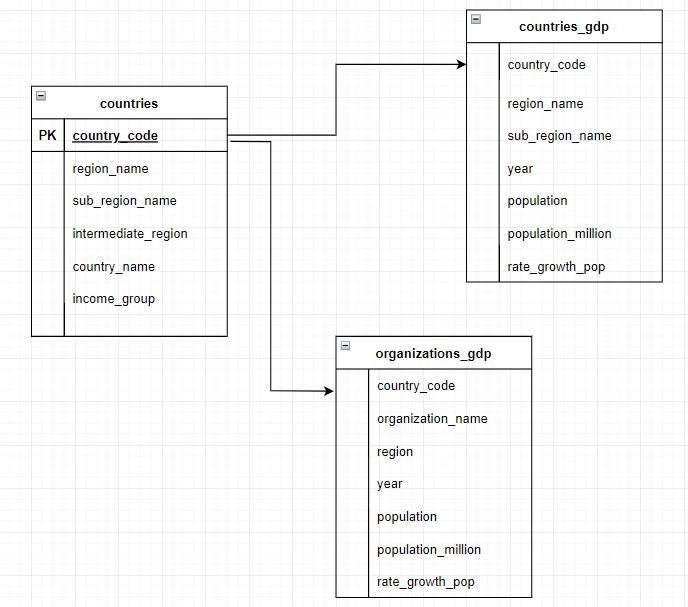

In [25]:
#visualize data model
from IPython.display import Image
Image(filename='data_model.JPG',width=700)

In [26]:
#run function create database
cur, conn = create_database()

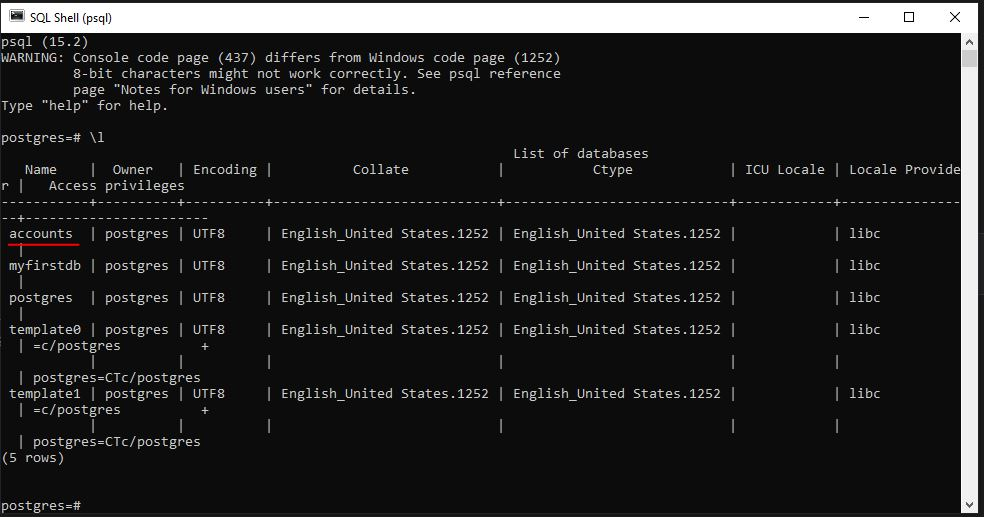

In [27]:
#check PostgreSQL to see database 'accounts' was created
Image(filename='create_database_postgresql.JPG', width=1000)

In [28]:
# Roll back any existing transaction and start a new one
cur.execute("ROLLBACK")
cur.execute("BEGIN")
cur.execute("DROP TABLE IF EXISTS accounts_countries")
conn.commit()

In [29]:
countries_table_create = ("CREATE TABLE IF NOT EXISTS accounts_countries "
                          "(country_code VARCHAR PRIMARY KEY, "
                          "region_name VARCHAR, "
                          "sub_region_name VARCHAR, "
                          "intermediate_region VARCHAR, "
                          "country_name VARCHAR, "
                          "income_group VARCHAR)")

In [30]:
# Roll back any existing transaction and start a new one
cur.execute("ROLLBACK")
cur.execute("BEGIN")
cur.execute(countries_table_create)
conn.commit()

In [31]:
df_countries_gdp.dtypes

country_code           object
region_name            object
sub_region_name        object
year                    int64
population            float64
population_million    float64
rate_growth_pop        object
dtype: object

In [32]:
# Roll back any existing transaction and start a new one
cur.execute("ROLLBACK")
cur.execute("BEGIN")
cur.execute("DROP TABLE IF EXISTS accounts_countries_gdp")
conn.commit()

In [33]:

countries_gdp_table_create = """
CREATE TABLE accounts_countries_gdp (
    country_code VARCHAR,
    region_name VARCHAR,
    sub_region_name VARCHAR,
    year NUMERIC,
    population NUMERIC,
    population_million NUMERIC,
    rate_growth_pop FLOAT
)
"""

In [34]:
# Roll back any existing transaction and start a new one
cur.execute("ROLLBACK")
cur.execute("BEGIN")
cur.execute(countries_gdp_table_create)
conn.commit()

In [35]:
df_organizations_gdp.dtypes

country_code           object
organization_name      object
region                 object
year                    int64
population            float64
population_million    float64
rate_growth_pop       float64
dtype: object

In [36]:
# Roll back any existing transaction and start a new one
cur.execute("ROLLBACK")
cur.execute("BEGIN")
cur.execute("DROP TABLE IF EXISTS accounts_organizations")
conn.commit()

In [37]:
organizations_gdp_table_create = ("""
CREATE TABLE IF NOT EXISTS accounts_organizations (
    country_code VARCHAR,
    organization_name VARCHAR,
    region VARCHAR,
    year NUMERIC,
    population NUMERIC,
    population_million NUMERIC,
    rate_growth_pop FLOAT
)
""")

In [38]:
# Roll back any existing transaction and start a new one
cur.execute("ROLLBACK")
cur.execute("BEGIN")
cur.execute(organizations_gdp_table_create)
conn.commit()

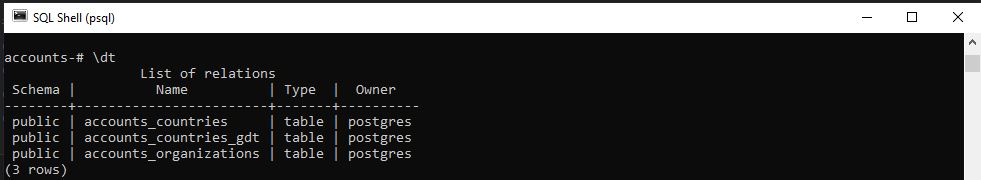

In [39]:
#check PostgreSQL to see the three tables were created
Image(filename='create_tables_postgresql.JPG', width=1000)

In [40]:
countries_table_insert = ("""INSERT INTO accounts_countries(
                                country_code,
                                region_name,
                                sub_region_name,
                                intermediate_region,
                                country_name,
                                income_group)
                                VALUES (%s,%s,%s,%s,%s,%s)
                                """)

In [41]:
cur.execute("ROLLBACK")
cur.execute("BEGIN")
for i, row in df_countries.iterrows():
    cur.execute(countries_table_insert, list(row))
conn.commit()

In [65]:
header = list(df_countries.columns)
print(header)
for i, row in df_countries.head().iterrows():
    print(list(row))

['country_code', 'region_name', 'sub_region_name', 'intermediate_region', 'country_name', 'income_group']
['ABW', 'Americas', 'Latin America and the Caribbean', 'Caribbean', 'Aruba', 'Ingreso alto']
['AFG', 'Asia', 'Southern Asia', 'no data', 'Afghanistan', 'Países de ingreso bajo']
['AGO', 'Africa', 'Sub-Saharan Africa', 'Middle Africa', 'Angola', 'Países de ingreso mediano bajo']
['ALB', 'Europe', 'Southern Europe', 'no data', 'Albania', 'Ingreso mediano alto']
['AND', 'Europe', 'Southern Europe', 'no data', 'Andorra', 'Ingreso alto']


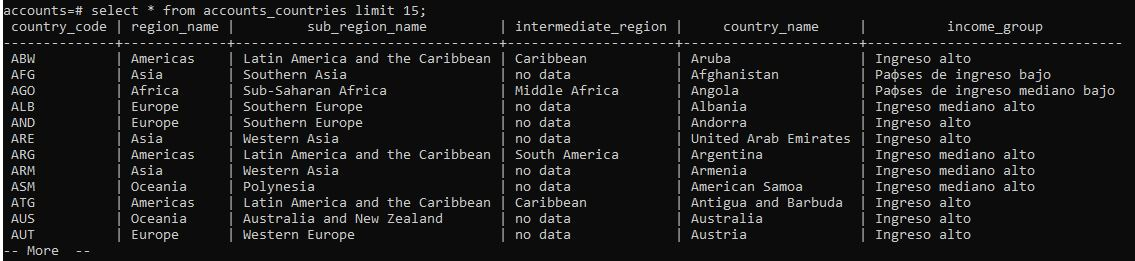

In [43]:
#check PostgreSQL to see the values inserted in accounts_countries
Image(filename='tables accounts with insert values.JPG', width=1000)

In [44]:
countries_gdp_table_insert = (""" INSERT INTO accounts_countries_gdp (
                                    country_code,
                                    region_name,
                                    sub_region_name,
                                    year,
                                    population,
                                    population_million,
                                    rate_growth_pop
                                    )
                                    VALUES (%s,%s,%s,%s,%s,%s,%s)
                                    """)

In [45]:
cur.execute("ROLLBACK")
cur.execute("BEGIN")
for i, row in df_countries_gdp.iterrows():
    cur.execute(countries_gdp_table_insert, list(row))
conn.commit()

In [62]:
header = list(df_countries.columns)
print(header)
for i, row in df_countries_gdp.head(15).iterrows():  
    print(list(row))

['country_code', 'region_name', 'sub_region_name', 'intermediate_region', 'country_name', 'income_group']
['ABW', 'Americas', 'Latin America and the Caribbean', 1960, 0.0, 0.0, '0.0']
['ABW', 'Americas', 'Latin America and the Caribbean', 1961, 0.0, 0.0, '0.0']
['ABW', 'Americas', 'Latin America and the Caribbean', 1962, 0.0, 0.0, '0.0']
['ABW', 'Americas', 'Latin America and the Caribbean', 1963, 0.0, 0.0, '0.0']
['ABW', 'Americas', 'Latin America and the Caribbean', 1964, 0.0, 0.0, '0.0']
['ABW', 'Americas', 'Latin America and the Caribbean', 1965, 0.0, 0.0, '0.0']
['ABW', 'Americas', 'Latin America and the Caribbean', 1966, 0.0, 0.0, '0.0']
['ABW', 'Americas', 'Latin America and the Caribbean', 1967, 0.0, 0.0, '0.0']
['ABW', 'Americas', 'Latin America and the Caribbean', 1968, 0.0, 0.0, '0.0']
['ABW', 'Americas', 'Latin America and the Caribbean', 1969, 0.0, 0.0, '0.0']
['ABW', 'Americas', 'Latin America and the Caribbean', 1970, 0.0, 0.0, '0.0']
['ABW', 'Americas', 'Latin America a

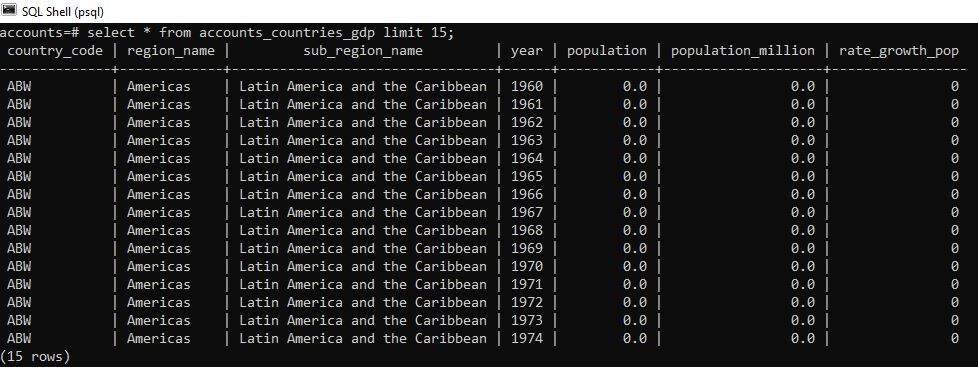

In [47]:
#check PostgreSQL to see the values inserted in accounts_countries_gdp
Image(filename='tables accounts_countries_gdp with insert values.JPG', width=1000)

In [48]:
organizations_table_insert = ("""INSERT INTO accounts_organizations(
                                country_code,
                                organization_name,
                                region,
                                year,
                                population,
                                population_million,
                                rate_growth_pop)
                                VALUES (%s,%s,%s,%s,%s,%s,%s)
                                """)

In [49]:
cur.execute("ROLLBACK")
cur.execute("BEGIN")
for i, row in df_organizations_gdp.iterrows():
    cur.execute(organizations_table_insert, list(row))
conn.commit()

In [63]:
header = list(df_organizations_gdp.columns)
print(header)
for i, row in df_organizations_gdp.head(15).iterrows():
    print(list(row))

['country_code', 'organization_name', 'region', 'year', 'population', 'population_million', 'rate_growth_pop']
['AFE', nan, 'Sin region', 1960, 21290811193.8164, 21290.8111938164, 0.0]
['AFE', nan, 'Sin region', 1961, 21808704493.2553, 21808.7044932553, 0.237304296005121]
['AFE', nan, 'Sin region', 1962, 23707266143.4721, 23707.266143472098, 7.98446046472907]
['AFE', nan, 'Sin region', 1963, 28210335256.1952, 28210.3352561952, 5.16387335113851]
['AFE', nan, 'Sin region', 1964, 26119063726.3905, 26119.063726390497, 4.58367684527478]
['AFE', nan, 'Sin region', 1965, 29682486700.3738, 29682.4867003738, 5.32804421525157]
['AFE', nan, 'Sin region', 1966, 32239462540.9567, 32239.462540956694, 3.91390855239683]
['AFE', nan, 'Sin region', 1967, 33514906531.5053, 33514.9065315053, 5.25530876450813]
['AFE', nan, 'Sin region', 1968, 36521869225.3694, 36521.8692253694, 4.02630212024955]
['AFE', nan, 'Sin region', 1969, 41828778631.7557, 41828.7786317557, 5.27836619834736]
['AFE', nan, 'Sin region'

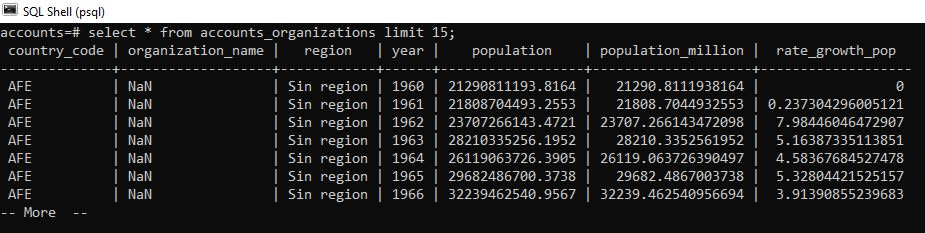

In [51]:
#check PostgreSQL to see the values inserted in accounts_countries_gdp
Image(filename='tables accounts_organizations with insert values.JPG', width=1000)

In [52]:
conn.close()